This notebooks study fitting linear regression model using gradient descend implemented using primitive ``tf.gradients``.



In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

We first create a tensorflow session object, which is used to run tensorflow graph.

In [2]:
# we don't want any single process to take all memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
config.gpu_options.per_process_gpu_memory_fraction = 0.3
sess = tf.Session(config=config)       
tf.keras.backend.set_session(sess)

### Model

This is a linear function

In [3]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.W = tf.Variable(5.0, name='kernel')
        self.b = tf.Variable(0.0, name='bias')

    def __call__(self, x):
        return self.W * x + self.b
  

In [18]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### The gradients of objective unction

#### tf.gradients

Tensorflow offer automatic differentiation functionality via ``tf.gradients(ys, xs)`` computes the following: $$[\sum_{y \in ys}(\frac{dy}{dx_1}) \dots \sum_{y \in ys}(\frac{dy}{dx_{|xs|}})].$$ 
The shape of returned result matched the shape of ``xs``. So in the above visualiztation ``xs`` is a row vector. Typically we have ys and xs each as a tensor

In [5]:
# parameters
ws = tf.constant([1.,2., 3.])

# losses
l1 = tf.reduce_sum(ws)
l2 = tf.reduce_sum(ws ** 2)
loss = [l1 , l2]

``tf.gradients`` provides a nice way to compute $\nabla(l1+l2)$

In [6]:
sess.run(tf.gradients(loss, ws))

[array([3., 5., 7.], dtype=float32)]

In [7]:
sess.run(tf.gradients(l1+l2, ws))

[array([3., 5., 7.], dtype=float32)]

### Training data

In [8]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [9]:
with tf.Session() as sess:
    inputs, noise, outputs = sess.run([inputs, noise, outputs])

### Gradient descent

In [12]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
config.gpu_options.per_process_gpu_memory_fraction = 0.3
sess = tf.Session(config=config)       

We create a model which has two parameters ``model.W`` and `` model.b``

In [13]:
model = Model()

In order to use tensorflow variables in any computation, we need to initialize them first.

In [19]:
init_op = tf.global_variables_initializer()
current_loss = loss(model(inputs), outputs)

In [21]:
sess.run(init_op)

The core computation of gradient descent is to compute the gradient of loss function wrt to model parametersl. This can be done as follows.

In [22]:
tf.gradients(current_loss, [model.W, model.b])

[<tf.Tensor 'gradients_2/mul_2_grad/Reshape:0' shape=() dtype=float32>,
 <tf.Tensor 'gradients_2/add_4_grad/Reshape_1:0' shape=() dtype=float32>]

Now we need to set the learning rate. 

In [23]:
learning_rate = 0.1

In [24]:
epochs = range(10)
Ws = []
bs = []
for epoch in epochs:
    dW, db = tf.gradients(current_loss, [model.W, model.b])
    update_W = model.W.assign_sub(learning_rate * dW)
    update_b = model.b.assign_sub(learning_rate * db)
    sess.run([update_W, update_b])
    Ws.append(sess.run(model.W))
    bs.append(sess.run(model.b))
#     print(sess.run([update_W, update_b]))
#     print(sess.run([model.W, model.b]))

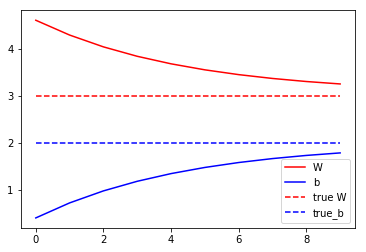

In [25]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

In [26]:
sess.run(model.W)

3.2497141

In [36]:
model(inputs)

<tf.Tensor 'add_6:0' shape=(1000,) dtype=float32>

Ok let's see how our learned linear regression model fit the dataset.

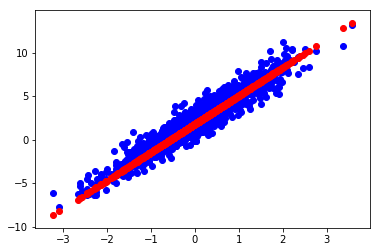

In [29]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, sess.run(model(inputs)), c='r')
